In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
# data = pd.read_csv("39-features-tarcutta-denoised-spectral.csv")
# data

In [3]:
# features = data.iloc[:, 0:39].values
# labels_true = data["class"]

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Load dataset
df = pd.read_csv("39-features-combined.csv")
X = df.iloc[:, 0:26]
# y = df.iloc[:, 40]
y = df['class']
feature_names = list(X.columns)

In [6]:
X

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.626714,0.827684,0.930313,0.501803,0.542249,0.468979,0.318348,0.379219,0.426658,0.446274,...,0.133527,0.066925,0.090731,0.105585,0.107535,0.108751,0.075482,0.067649,0.053004,0.060741
1,0.461087,0.744750,0.883125,0.514840,0.533231,0.482730,0.353830,0.435641,0.525935,0.468374,...,0.160717,0.110767,0.154943,0.138804,0.112483,0.145739,0.146738,0.120992,0.096725,0.116581
2,0.390126,0.682046,0.955433,0.424473,0.592745,0.418916,0.387924,0.392779,0.492717,0.520399,...,0.158850,0.155206,0.172251,0.158631,0.146236,0.154209,0.142839,0.150927,0.136042,0.151372
3,0.664164,0.821859,1.000000,0.475881,0.561929,0.409417,0.350974,0.338424,0.422630,0.434366,...,0.062522,0.039222,0.071378,0.062360,0.056037,0.061382,0.037769,0.042122,0.035481,0.040251
4,0.359122,0.657137,0.954445,0.442800,0.623291,0.419816,0.392054,0.391199,0.492590,0.518938,...,0.150830,0.140484,0.158009,0.146498,0.138326,0.147931,0.133345,0.137966,0.120983,0.128908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,0.301206,0.663619,0.506474,0.483446,0.339153,0.328054,0.592441,0.297489,0.325433,0.573921,...,0.586482,0.614410,0.677733,0.658291,0.677127,0.730456,0.718595,0.673550,0.734756,0.718731
8837,0.381229,0.726267,0.507784,0.493554,0.343453,0.351584,0.604663,0.317996,0.361661,0.551219,...,0.515009,0.524750,0.599630,0.627453,0.605725,0.634721,0.638025,0.570324,0.591679,0.562636
8838,0.301759,0.675123,0.532110,0.497538,0.385665,0.322101,0.490745,0.162315,0.240721,0.450908,...,0.643623,0.697675,0.723664,0.704678,0.704115,0.713231,0.727501,0.769329,0.764462,0.737215
8839,0.352168,0.701405,0.512569,0.525775,0.360312,0.325813,0.500054,0.195244,0.298270,0.532275,...,0.639254,0.623274,0.609721,0.606815,0.587516,0.649631,0.698914,0.669619,0.709280,0.703559


In [7]:
y

0       anthrophony
1       anthrophony
2       anthrophony
3       anthrophony
4       anthrophony
           ...     
8836          other
8837          other
8838          other
8839          other
8840          other
Name: class, Length: 8841, dtype: object

In [8]:
# df = pd.read_csv("39-features-wambiana.csv")
# df = df.dropna()
# X = df.iloc[:, 0:13]
# X

In [9]:
# y = df.iloc[:, 40]
# y

In [10]:
target_names = list(y.unique())
target_names

['anthrophony', 'biophony', 'geophony', 'other']

In [11]:
from sklearn.manifold import TSNE
X = TSNE(n_components=3, learning_rate=150, perplexity=50, verbose=2, angle=0.1, random_state=0).fit_transform(X)

: 

: 

In [ ]:
# import umap

# X = umap.UMAP(n_components=3, random_state=0, n_neighbors=6,
#             min_dist=0.1).fit_transform(X)

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Prepare and scale the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Create a PCA instance
# pca = PCA(n_components=7)

# # Fit the data to PCA
# pca.fit(X_scaled)

# # Transform the data to the new PCA space
# X = pca.transform(X_scaled)

In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV

# # Define your MLPClassifier
# clf = MLPClassifier()

# # Define the parameter grid for grid search
# param_grid = {
#     'hidden_layer_sizes': [(5,), (10,), (5, 2), (10, 5), (5, 5, 2)]
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# # Fit the grid search to your training data
# grid_search.fit(X, y)

# # Print the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users

{'fit_time': array([1.3514986 , 1.35049987, 1.35049915, 1.35450006, 1.34650016,
       1.36100006, 1.3440001 , 1.35100007, 1.34700012, 1.34149933]), 'score_time': array([0.00400019, 0.0045011 , 0.00449967, 0.00399995, 0.00450015,
       0.00450015, 0.00400066, 0.00450039, 0.00449991, 0.00450039]), 'estimator': [MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10))], 'test_accuracy': array([0.87457627, 0.97285068, 0.96606335, 0.94117647, 0.96153846,
       0.95135747, 0.97058824, 0

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users

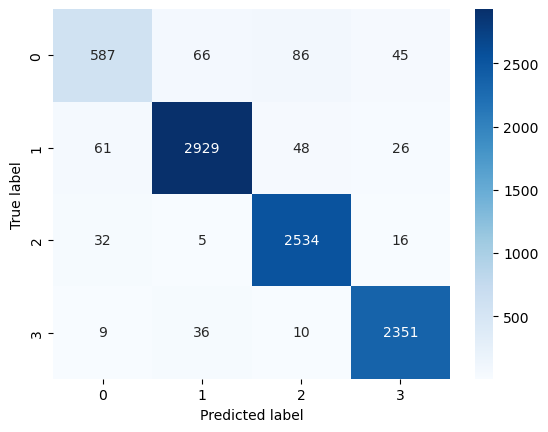

              precision    recall  f1-score   support

 anthrophony       0.85      0.75      0.80       784
    biophony       0.96      0.96      0.96      3064
    geophony       0.95      0.98      0.96      2587
       other       0.96      0.98      0.97      2406

    accuracy                           0.95      8841
   macro avg       0.93      0.92      0.92      8841
weighted avg       0.95      0.95      0.95      8841



In [ ]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = {
    'ANN': MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 10)),
}

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for name, clf in classifiers.items():
    if name == 'ANN':
        # Add your input features and target variable to X and y respectively
        cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring, return_estimator=True)
        print(cv_results)
        acc = cv_results['test_accuracy'].mean()
        precision = cv_results['test_precision_macro'].mean()
        recall = cv_results['test_recall_macro'].mean()
        f1 = cv_results['test_f1_macro'].mean()
        print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

        y_pred = cross_val_predict(clf, X, y, cv=10)
        cm = confusion_matrix(y, y_pred)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()

        # There is no need to generate decision tree diagram or feature importance for ANN
    else:
        continue  # Skip other classifiers

    print(classification_report(y, y_pred, target_names=target_names))


In [ ]:
# from sklearn import svm, tree
# from sklearn.model_selection import cross_validate, cross_val_predict
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'SVM': svm.SVC(),
#     'DT': tree.DecisionTreeClassifier(),
#     #'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)),
#     'kNN': KNeighborsClassifier(n_neighbors=5),
#     'Bayes': GaussianNB()
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# for name, clf in classifiers.items():
#     if name == 'ANN':
#         # Add your input features and target variable to X and y respectively
#         cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring, return_estimator=True)
#         print(cv_results)
#         acc = cv_results['test_accuracy'].mean()
#         precision = cv_results['test_precision_macro'].mean()
#         recall = cv_results['test_recall_macro'].mean()
#         f1 = cv_results['test_f1_macro'].mean()
#         print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#         y_pred = cross_val_predict(clf, X, y, cv=10)
#         cm = confusion_matrix(y, y_pred)
#         plt.figure()
#         sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#         plt.xlabel('Predicted label')
#         plt.ylabel('True label')
#         plt.show()

#         # There is no need to generate decision tree diagram or feature importance for ANN
#     else:
#         cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)
#         print(cv_results)
#         acc = cv_results['test_accuracy'].mean()
#         precision = cv_results['test_precision_macro'].mean()
#         recall = cv_results['test_recall_macro'].mean()
#         f1 = cv_results['test_f1_macro'].mean()
#         print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#         y_pred = cross_val_predict(clf, X, y, cv=10)
#         cm = confusion_matrix(y, y_pred)
#         plt.figure()
#         sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#         plt.xlabel('Predicted label')
#         plt.ylabel('True label')
#         plt.show()
#         # Generate decision tree diagram and feature importance for DT classifier
#         if name == 'DT':
#             clf.fit(X, y)  # Fit the model before accessing feature importances
#             plt.figure(figsize=(20, 10))
#             plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
#             plt.show()
#             print(f"Feature importances: {clf.feature_importances_}")

#     print(classification_report(y, y_pred, target_names=target_names))


In [ ]:
# from sklearn import svm, tree
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'SVM': svm.SVC(),
#     'DT': tree.DecisionTreeClassifier(),
#     'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)),
#     'kNN': KNeighborsClassifier(n_neighbors=5),
#     'Bayes': GaussianNB()
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# for name, clf in classifiers.items():
#     cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)
#     print(cv_results)
#     acc = cv_results['test_accuracy'].mean()
#     precision = cv_results['test_precision_macro'].mean()
#     recall = cv_results['test_recall_macro'].mean()
#     f1 = cv_results['test_f1_macro'].mean()
#     print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#     y_pred = cross_val_predict(clf, X, y, cv=10)
#     cm = confusion_matrix(y, y_pred)
#     plt.figure()
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')
#     plt.show()
#     # Generate decision tree diagram and feature importance for DT classifier
#     if name == 'DT':
#         clf.fit(X, y)  # Fit the model before accessing feature importances
#         plt.figure(figsize=(20, 10))
#         plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
#         plt.show()
#         print(f"Feature importances: {clf.feature_importances_}")
    
#     print(classification_report(y, y_pred, target_names=target_names))